In [5]:
%display plain

# TP 2 Math603

## Exercice 1:

1. On souhaite calculer à tout instant $t$ la valeure de $r(t)$.
On connait $r(0) \in \mathbb R_+$. On peut calculer l'épaisseur de papier $S(t)$ déjà utilisée. On a
$$S(t) = \int_0^t \varepsilon v(\tau)d\tau = \pi r(0)^2 - \pi r(t)^2 \implies r(t) = \sqrt{r(0)^2 - \dfrac{\varepsilon}{\pi}\int_0^tv(\tau)d\tau}$$

2. Soit $v_c$ la lecture actuelle de la vitesse du rouleau.
On peut déduire de l'égalité précédente une approximation de $r(t)$ par la suite récurrente
$$
\begin{array}{lllr}
r_0&:=&r(0)&\\
r_{n+1}&:=& \sqrt{r_n^2-\dfrac{\varepsilon \Delta t}{\pi}v_c},&n \in [\![0,n-1]\!]
\end{array}
$$


3. On souhaite savoir quel $\Delta t$ prendre afin de ne pas surcharger le processeur. En même temps on ne peut pas juste choisir un $\Delta t$ quelconque car les erreurs d'approximation sont répercutées sur toutes la suite et donc, avoir une trop grande incertitude rendrait l'approximation caduque.

On peut dors et déjà économiser de la puissance de calculs en ne stockant que la suite des $(r_n^2)$, en effet cela nous permet de ne pas avoir à calculer la racine carrée à chaque opération et de toute façon notre récurrence remet au carré le terme précédent.
$$
\begin{cases}
r_0&:=&r(0)&\\
r_{n+1}^2&:=& {r_n^2-\dfrac{\varepsilon \Delta t}{\pi}v_c}
\end{cases}
$$

Encore une fois on peut cacher la valeur de notre produit de constantes: $\rho := -\dfrac{\varepsilon \times \Delta t}{\pi}$

$$
\begin{cases}
r_0&:=&r(0)&\\
r_{n+1}^2&:=& {r_n^2+\rho v_c}
\end{cases}
$$

On en déduit donc que le cout en cycles de création d'un élément de notre suite se décompose comme suit:
+ 3 lectures: il faut lire $r_n^2$, $\rho$ et $v_c$
+ 1 multiplications: $\rho$ multiplier avec $v_c$
+ 1 addition: sommer les deux constantes obtenues
+ 1 écriture: sauvegarder la valeur de $r_{n+1}$

Soit donc $3\times2+2\times4+2=16$ opérations entre chaque intervalle d'échantillonage.
Dans le cas où notre controlleur est ralenti par une quelconque tache et tourne donc à 500 MHz, il aurait pour valeur d'échantillonage minimale $31.25\cdot 10^{-6}s$.
On serait donc à l'aise avec une pulling rate de $30\cdot 10^{-6}s$ par sécurité.


## Exercice 2:

1. On déduit de la question 1.1 que

$$
\begin{array}{lll}
r(t)& = &\sqrt{r(0)^2 - \dfrac{\varepsilon}{\pi}\int_0^tv(\tau)d\tau} \\
\dfrac{\partial r}{\partial t} & = & \dfrac{\dfrac{\varepsilon}{\pi}v}{2\sqrt{r(0)^2 - \dfrac{\varepsilon}{\pi}\int_0^tv(\tau)d\tau}} \\
\dfrac{\partial r}{\partial t} & = & \dfrac{\varepsilon v}{2\pi r}
\end{array}
$$

2. On construit un solveur d'Euler pour cette équation.

On a le problème de cauchy suivant
$$
\begin{cases}
\dfrac{\partial r}{\partial t} & = & \dfrac{\varepsilon v}{2\pi r} \\
r(0) & = & r_0
\end{cases}
$$
On pose
$$
\begin{array}{}
T& \in & \mathbb R_+^* \\
N& \in & \mathbb N^* \\
I & = & [0,T] \\
h &=& \dfrac{T}{N} \\
(t_n)_{n\in \mathbb N} & \text{tq.} & t_n = nh & \forall n \in \mathbb N \\
\varphi &=& \dfrac{\varepsilon v_c}{2\pi}
\end{array}
$$
On a alors l'approximation de la solution du problème de Cauchy $(\hat{y_n})_{0 \leqslant n \leqslant N}$ avec
$$
\begin{cases}
\hat y_0 &=& y_0\\
\hat y_{n+1} &=& \hat y_n + \dfrac{\varphi}{\hat y_n}
\end{cases}
$$

comptabilisant ainsi 33 opérations par calculs.

On en déduit que l'intervalle minimum d'échantillonage est de $15.15\cdot 10^{-6}s$, on arrondi en dessous par sécurité: $15\cdot 10^{-6}s$ 

4. Grace aux optimisations misent en place lors de l'exercice 1, cette méthode seraient moins efficace que $(\star)$ (à condition de se satisfaire des carrés dans le cas de l'exercice 1)

5. On construit un solveur du système posé au dessus.

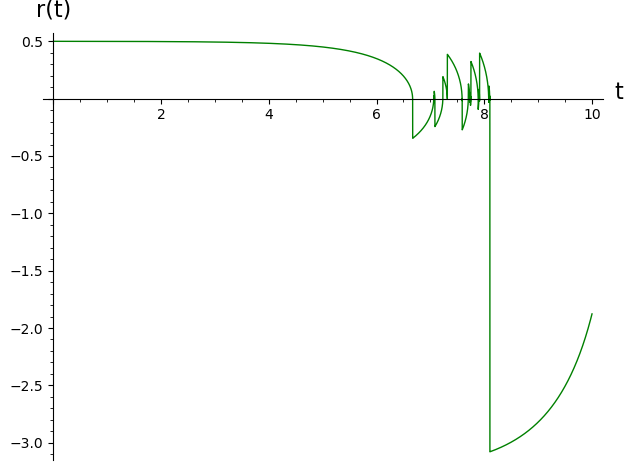

In [25]:
# Solver Euler pour dr/dt = -epsilon * v(t) / (2π r(t))

def euler_solver(v, epsilon, r0, T, dt):
    times = [0]
    values = [r0]
    
    r = r0
    t = 0
    while t < T:
        dr_dt = n(- (epsilon * v(t)) / (2 * pi * r))
        r = n(r + dt * dr_dt)
        t = n(t + dt)
        times.append(t)
        values.append(r)
    return zip(times, values)

# Supposons, par exemple, que la vitesse est  sinusoidale:
def v_sinusoidale(t):
    return 2 + sin(t)
def v_lin(t):
    return 5*t

# Paramètres:
epsilon = 0.001
r0 = 0.5
T = 10
dt = 0.001

sol = euler_solver(v_sinusoidale, epsilon, r0, T, dt)
#Traçons la solution:
list_plot(list(sol), plotjoined=True, color='green',axes_labels=["t", "r(t)"])